(array([747., 163.,  40.,  29.,  10.,   4.,   5.,   1.,   0.,   1.]),
 array([ 0.        ,  1.30666667,  2.61333333,  3.92      ,  5.22666667,
         6.53333333,  7.84      ,  9.14666667, 10.45333333, 11.76      ,
        13.06666667]),
 <BarContainer object of 10 artists>)

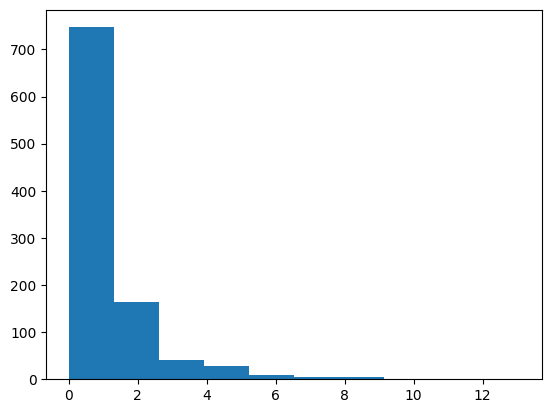

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

n = 60
p = 0.5
N = 10**3

o1 = np.random.binomial(n, p, N)
o2 = np.ndarray((N))
o2.fill(60)
o2 = o2 - o1

e1 = np.ndarray((N))
e1.fill(int(n / 2))
e2 = e1.copy()

simulated_chi_dist = (o1 - e1)**2 / e1 + (o2 - e2)**2 / e2

plt.hist(simulated_chi_dist)

<AxesSubplot: ylabel='Density'>

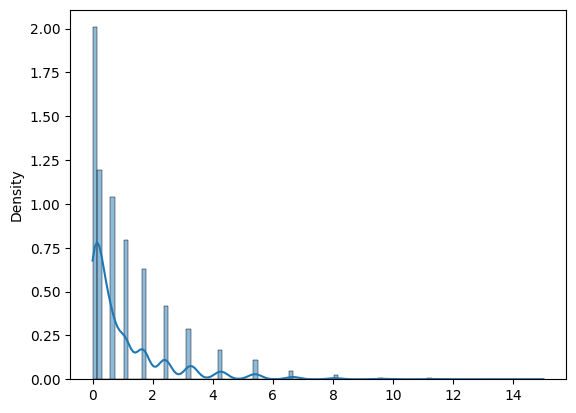

In [1]:
# или вот еще: https://stepik.org/lesson/24814/step/3?unit=7105

import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())


import seaborn as sns

#display(sns.distplot(list_of_chi_square))

display(sns.histplot(list_of_chi_square, kde=True, stat='density'))


import matplotlib.pyplot as plt

#display(plt.hist(list_of_chi_square))

In [2]:


# проверка на нормальность распредления с помощью Shapiro теста 
# https://stepik.org/lesson/26559/step/6?unit=8406

#Напишите функцию normality_test, которая получает на вход dataframe с произвольным 
#количеством переменных разных типов (количественные, строки, факторы) и проверяет 
#нормальность распределения количественных переменных. 
#Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной.
#Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

from scipy.stats import shapiro
import pandas as pd
import numpy as np

df=pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')
display(df)


def norm_test(df):
  df_n = df.select_dtypes(include=np.number)
  df_s = df_n.apply(shapiro, axis=0) 
  return  df_s.iloc[1]

display(norm_test(df))

,V1,V2,V3,V4,V5,V6
0,10.03,s,9.35,s,9.91,11.23
1,12.45,x,11.61,x,10.07,6.41
2,9.97,a,7.02,a,8.85,11.38
3,10.53,f,12.24,f,7.22,8.71
4,6.59,b,7.72,b,14.31,10.08
5,7.26,j,12.19,j,10.75,11.71
6,6.97,g,7.80,g,9.91,6.99
7,11.99,o,10.98,o,6.04,11.38
8,9.39,k,9.86,k,9.94,11.14
9,13.58,z,11.12,z,6.58,11.58


V1    0.568211
V3    0.245836
V5    0.314189
V6    0.009374
Name: 1, dtype: float64

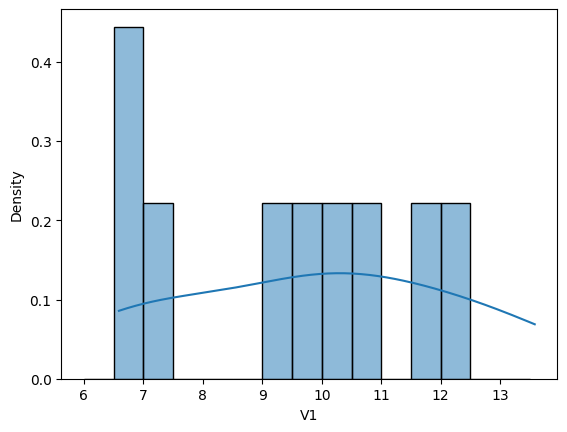

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

df=pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')

g=sns.histplot(df.V1, kde=True, stat="density", bins=np.arange(6, 14, .5))
# параметр bins дает задать диапазон для значений в диапазоне (a,b) с шагом c

#for ax in g.axes.flat:
#    ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.show()
